Input: current Metro Plan
Ouput: Graph containing the cetroids grouped by cluster according to the NS stops that are closest to them by distance 

Centroid 0: Nearest NS_locs index: [[8]]
Centroid 1: Nearest NS_locs index: [[12]]
Centroid 2: Nearest NS_locs index: [[5]]
Centroid 3: Nearest NS_locs index: [[11]]
Centroid 4: Nearest NS_locs index: [[0]]
Centroid 5: Nearest NS_locs index: [[0]]
Centroid 6: Nearest NS_locs index: [[8]]
Centroid 7: Nearest NS_locs index: [[0]]
Centroid 8: Nearest NS_locs index: [[0]]
Centroid 9: Nearest NS_locs index: [[12]]
Centroid 10: Nearest NS_locs index: [[13]]
Centroid 11: Nearest NS_locs index: [[9]]
Centroid 12: Nearest NS_locs index: [[0]]
Centroid 13: Nearest NS_locs index: [[0]]
Centroid 14: Nearest NS_locs index: [[0]]
Centroid 15: Nearest NS_locs index: [[0]]
Centroid 16: Nearest NS_locs index: [[0]]
Centroid 17: Nearest NS_locs index: [[0]]
Centroid 18: Nearest NS_locs index: [[0]]
Centroid 19: Nearest NS_locs index: [[0]]
Centroid 20: Nearest NS_locs index: [[0]]
Centroid 21: Nearest NS_locs index: [[0]]
Centroid 22: Nearest NS_locs index: [[0]]
Centroid 23: Nearest NS_locs index: [[0]

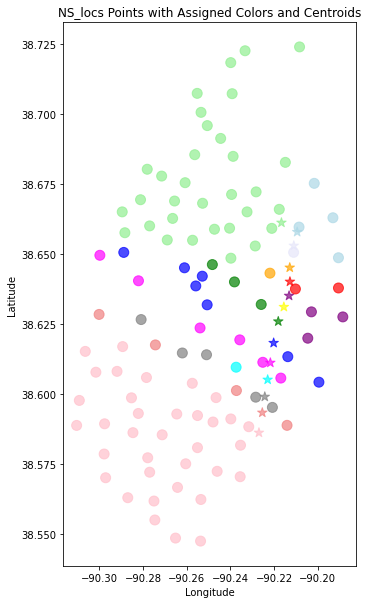

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,LAYER,AREA_SQMI,SHAPE_area,SHAPE_len,geometry,color
0,29,510,123200,29510123200,1232,Census Tract 1232,G5020,S,1113329,0,+38.6132904,-090.2137501,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,POINT (-90.21375 38.61329),"8 blue Name: color, dtype: object"
1,29,510,124600,29510124600,1246,Census Tract 1246,G5020,S,2152098,578571,+38.5890298,-090.2141395,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,POINT (-90.21410 38.58875),"12 lightcoral Name: color, dtype: object"
2,29,510,125500,29510125500,1255,Census Tract 1255,G5020,S,1099352,0,+38.6293098,-090.2029461,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,POINT (-90.20295 38.62931),"5 purple Name: color, dtype: object"
3,29,510,104500,29510104500,1045,Census Tract 1045,G5020,S,1939714,0,+38.6265570,-090.2808684,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,POINT (-90.28087 38.62656),"11 gray Name: color, dtype: object"
4,29,510,106100,29510106100,1061,Census Tract 1061,G5020,S,962329,0,+38.6693968,-090.2811551,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,POINT (-90.28114 38.66939),"0 lightgreen Name: color, dtype: object"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,29,510,125700,29510125700,1257,Census Tract 1257,G5020,S,1275441,194827,+38.6386487,-090.1906520,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,POINT (-90.19057 38.63784),"4 red Name: color, dtype: object"
100,29,510,123300,29510123300,1233,Census Tract 1233,G5020,S,918025,0,+38.6056360,-090.2169446,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,POINT (-90.21694 38.60564),"9 magenta Name: color, dtype: object"
101,29,510,124100,29510124100,1241,Census Tract 1241,G5020,S,1053135,0,+38.5882517,-090.2316196,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,POINT (-90.23162 38.58825),"13 pink Name: color, dtype: object"
102,29,510,124200,29510124200,1242,Census Tract 1242,G5020,S,797511,0,+38.5988105,-090.2284247,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,POINT (-90.22842 38.59881),"11 gray Name: color, dtype: object"


In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.neighbors import BallTree

# Read centroids and NS_locs shapefiles
centroids = gpd.read_file(r"data\Centroids.shp")
NS_locs = gpd.read_file(r"data\MetrolinkStations_NS_Shapefiles\MetrolinkStations_NS.shp")
stl = nx.read_weighted_edgelist(r"data\weighted_dual_list",delimiter='%',nodetype=str)

# Generate a list of colors
#colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'cyan', 'magenta', 'yellow', 'lightblue', 'lightgreen', 'lightcoral', 'gray']
colors = ['lightgreen','lightblue','lavender','orange','red','purple','yellow','green','blue','magenta', 'cyan','gray','lightcoral','pink']

# Add a 'color' column to NS_locs with different colors for each point
NS_locs['color'] = colors

# Initialize an empty 'color' column in centroids
centroids['color'] = ''

# Get NS_locs points as an array for BallTree
NS_locs_points = np.array([[point.x, point.y] for point in NS_locs['geometry']])

# Build BallTree for NS_locs
NS_locs_tree = BallTree(NS_locs_points, metric='haversine')

# Iterate through centroids and find the nearest NS_locs point
for idx, row in centroids.iterrows():
    centroid_coords = np.array([[row['geometry'].x, row['geometry'].y]])
    distances, nearest_NS_locs_idx = NS_locs_tree.query(centroid_coords, k=1)
    print(f"Centroid {idx}: Nearest NS_locs index: {nearest_NS_locs_idx}")
    
    # Check if nearest_NS_locs_idx is valid and within bounds
    if nearest_NS_locs_idx.size > 0 and nearest_NS_locs_idx[0] < len(NS_locs):
        nearest_NS_loc_color = NS_locs.loc[nearest_NS_locs_idx[0], 'color']
        centroids.at[idx, 'color'] = nearest_NS_loc_color
    else:
        centroids.at[idx, 'color'] = 'black'  # Handle case where nearest NS_locs point is not found or index is out of bounds

# Convert 'color' column in centroids to a list of colors
centroid_colors = centroids['color'].tolist()

# Plot NS_locs points with colors based on nearest centroids
ax = NS_locs.plot(markersize=100, alpha=0.7, figsize=(10, 10), legend=True, marker='*', c=NS_locs['color'])

# Flatten the nested list of colors
centroid_colors_flat = [color for sublist in centroid_colors for color in sublist]

# Plot centroids with marker colors based on the 'color' column
centroids.plot(ax=ax, markersize=100, alpha=0.7, marker='o', c=centroid_colors_flat, legend=True)
# Set plot title and labels
ax.set_title('NS_locs Points with Assigned Colors and Centroids')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()
display(centroids)

name:  1232  color:  8    blue
Name: color, dtype: object
name:  1246  color:  12    lightcoral
Name: color, dtype: object
name:  1255  color:  5    purple
Name: color, dtype: object
name:  1045  color:  11    gray
Name: color, dtype: object
name:  1061  color:  0    lightgreen
Name: color, dtype: object
name:  1055  color:  0    lightgreen
Name: color, dtype: object
name:  1052  color:  8    blue
Name: color, dtype: object
name:  1053  color:  0    lightgreen
Name: color, dtype: object
name:  1054  color:  0    lightgreen
Name: color, dtype: object
name:  1042  color:  12    lightcoral
Name: color, dtype: object
name:  1036  color:  13    pink
Name: color, dtype: object
name:  1051.98  color:  9    magenta
Name: color, dtype: object
name:  1065  color:  0    lightgreen
Name: color, dtype: object
name:  1066  color:  0    lightgreen
Name: color, dtype: object
name:  1063  color:  0    lightgreen
Name: color, dtype: object
name:  1072  color:  0    lightgreen
Name: color, dtype: object


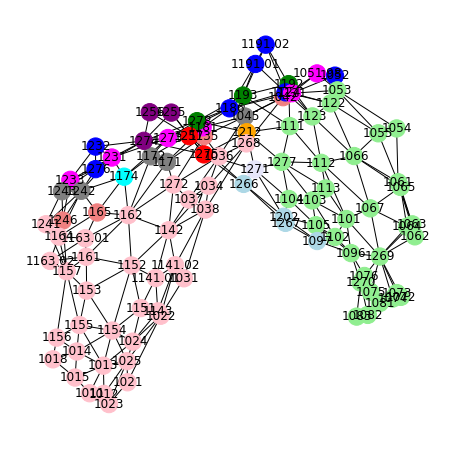

In [10]:
# Convert 'color' column in centroids to a list of colors
centroid_colors = centroids['color'].tolist()

# Create a new NetworkX graph
centroids_graph = nx.Graph()

# Add nodes with 'color' property to the graph
for idx, row in centroids.iterrows():
    centroid_name = row['NAME']  # Assuming 'NAME' is the identifier for nodes in 'stl'
    centroid_color = str(row['color'])  # Convert color to string
    centroids_graph.add_node(centroid_name, label=centroid_color)
    print('name: ',centroid_name,' color: ',centroid_color)
# Add edges from the 'stl' graph to centroids_graph
centroids_graph.add_edges_from(stl.edges(data=True))

centroid_colors_flat = [color for sublist in centroid_colors for color in sublist]

# Plot centroids with marker colors based on the 'color' colum
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw(centroids_graph, pos=nx.spring_layout(centroids_graph), node_color=centroid_colors_flat, ax=ax, with_labels=True)
plt.show()


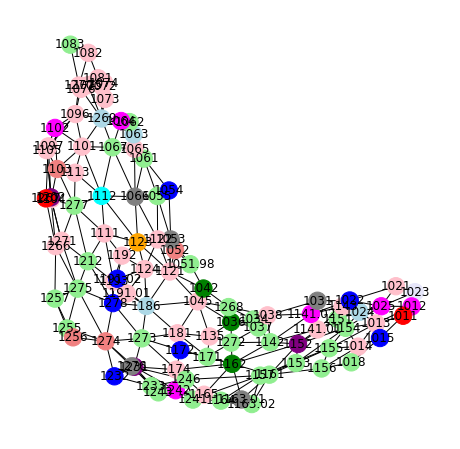

In [11]:
nx.write_gexf(centroids_graph, r"Graphs\NSgraph.gexf")
graph = nx.read_gexf("capstone.gexf")
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw(graph, pos=nx.spring_layout(centroids_graph), node_color=centroid_colors_flat, ax=ax, with_labels=True)


check to make sure the colors match